In [ ]:
# !pip install numpy pandas hvplot seaborn

# Project

Accessing functions from steinmetz_stats.py and steinmetz_plots.ipynb for your analysis. 

In [1]:
import numpy as np
import pandas as pd
import panel as pn
pn.extension()

import pandas as pd
import hvplot.pandas
import panel.widgets as pnw

In [ ]:
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/nih6mIiDSLOlPHU', 'data_project/2016-12-14_Cori.csv')
sciebo.download_file('https://uni-bonn.sciebo.de/s/DoUyHnkeTXSvMAL', 'data_project/steinmetz_plots.ipynb')
sciebo.download_file('https://uni-bonn.sciebo.de/s/yaYzNc6eR5LGfTo', 'data_project/steinmetz_stats.py')

In [2]:
df = pd.read_csv("data_project/2016-12-14_Cori.csv")
df.head(5)

,brain_area_lfp,trial,time,lfp,response_type,feedback_type
0,ACA,1,0.01,-2.850794,1.0,1.0
1,ACA,1,0.02,-4.039683,1.0,1.0
2,ACA,1,0.03,-4.195238,1.0,1.0
3,ACA,1,0.04,-3.228571,1.0,1.0
4,ACA,1,0.05,0.460317,1.0,1.0


In [ ]:
df.hvplot.explorer()

In [3]:
import import_ipynb

from data_project.steinmetz_plots import plot_lfp_time_and_heatmap, plot_lfp_for_brain_area
import data_project.steinmetz_stats as stst



<Axes: xlabel='time', ylabel='brain_area_lfp'>

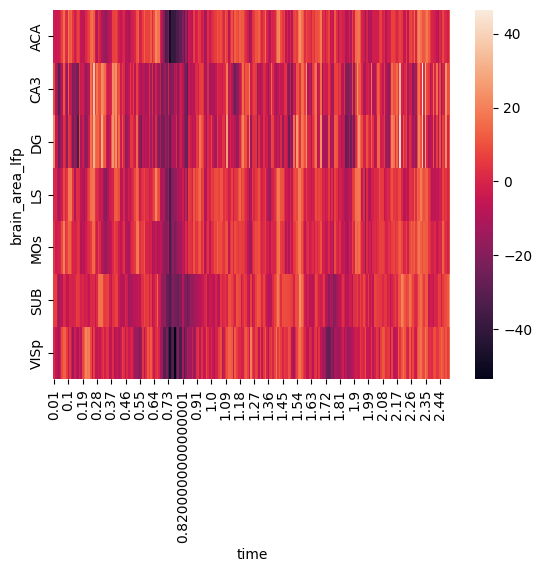

In [11]:
plot_lfp_time_and_heatmap(df, agg='first')

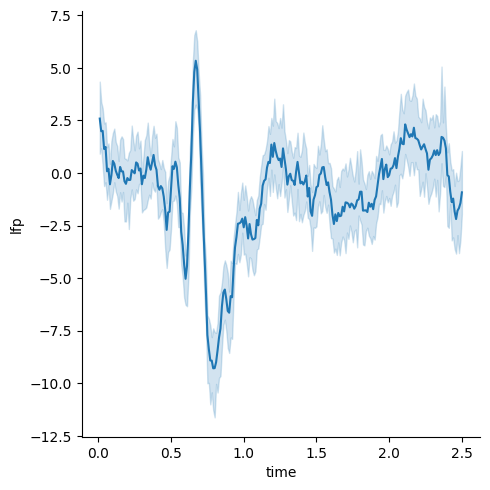

In [12]:
plot_lfp_for_brain_area(df, brain_area='VISp')

BokehModel(combine_events=True, render_bundle={'docs_json': {'eba5ed4d-8dc3-4ccf-b0bb-898015c1c24b': {'version…

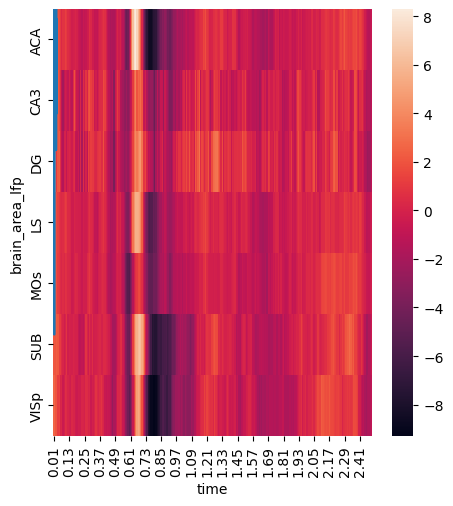

In [48]:
df_i=df.interactive()
Area_Selector= pnw.Select(name='Brain Area', options=list(df['brain_area_lfp'].unique()), value='VISp')
agg_selector = pnw.Select(name='Aggregation', options=['first', 'mean', 'std', 'min', 'max', 'median', 'sum', 'count'], value='mean')
c1=pn.Column(Area_Selector, plot_lfp_for_brain_area(df, brain_area=Area_Selector.value))
c2=pn.Column(agg_selector, plot_lfp_time_and_heatmap(df, agg=agg_selector.value))
dashboard=pn.Row(c2)
dashboard

BokehModel(combine_events=True, render_bundle={'docs_json': {'91ea06d6-8b59-4c09-91ed-65a831c1b341': {'version…

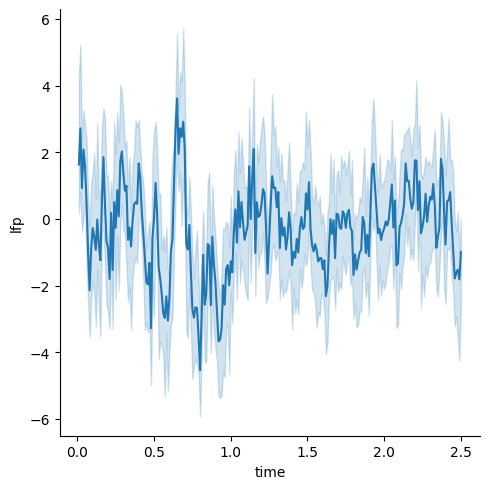

In [39]:
pn.Column(Area_Selector, plot_lfp_for_brain_area(df, brain_area=Area_Selector.value))